In [54]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from numpy import set_printoptions
np.set_printoptions(suppress=True)

In [55]:
df=pd.read_csv('bank/bank-full.csv',sep=';')
df.drop('duration', axis=1, inplace=True)

In [56]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [57]:
categories=df.select_dtypes(include=[object])
value_count={}
for column in categories.columns[0:]:
    value_count.update({column: df[column].unique() })
#     print(df[column].value_counts())
print(value_count)

{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object), 'marital': array(['married', 'single', 'divorced'], dtype=object), 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object), 'default': array(['no', 'yes'], dtype=object), 'housing': array(['yes', 'no'], dtype=object), 'loan': array(['no', 'yes'], dtype=object), 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object), 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object), 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object), 'y': array(['no', 'yes'], dtype=object)}


In [58]:
df['job']=df['job'].str.replace('-','_')
df['job']=df['job'].str.replace('.','')

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_3771/635156676.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['job']=df['job'].str.replace('.','')


In [6]:
X=df.drop(columns='y')
y=df['y']

In [7]:
X=pd.get_dummies(X)
X.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [9]:
X_train

,age,balance,day,campaign,pdays,previous,job_admin,job_blue_collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
17965,49,1415,30,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18299,42,3842,31,4,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10221,37,-119,11,11,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32192,56,3498,15,2,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,1,-1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
44732,23,508,8,1,92,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
38158,34,1317,15,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
860,33,165,7,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [112]:
plt.figure(dpi=150)
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='y')

In [26]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train, y_train)
print(f'accuracy score on trainin data: {decisiontree.score(X_train, y_train)}')

y_pred=decisiontree.predict(X_test)
print(f'accuracy score on test data: {decisiontree.score(X_test, y_test)}')

accuracy score on trainin data: 0.8950729927007299
accuracy score on test data: 0.8904124737365918


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.68      0.17      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



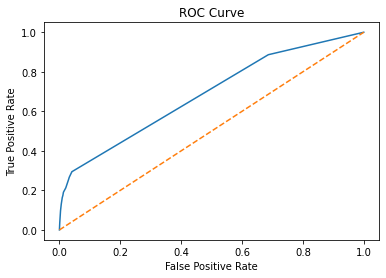

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, decisiontree.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')                             #decisiontree
                           
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


In [32]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
print(f'accuracy score on trainin data: {randomforest.score(X_train, y_train):.4f}')

y_pred=randomforest.predict(X_test)
print(f'accuracy score on test data: {randomforest.score(X_test, y_test):.4f}')

accuracy score on trainin data: 0.9999
accuracy score on test data: 0.8921


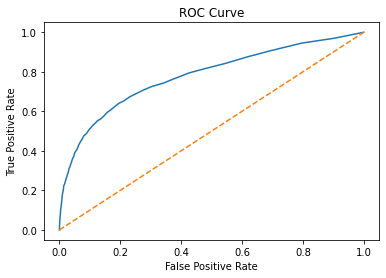

In [33]:
fpr, tpr, _ = roc_curve(y_test, randomforest.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')                     #randomforest

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

<Figure size 1800x1200 with 0 Axes>

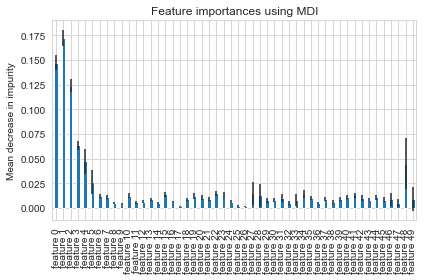

In [125]:
importances = randomforest.feature_importances_
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in randomforest.estimators_], axis=0)

plt.figure(dpi=300)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.879243613844963


In [18]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 21))
print(k_range)

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

y_predict=grid.predict(X_test)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best params:  {'n_neighbors': 16}
Best estimator:  KNeighborsClassifier(n_neighbors=16)
Best score:  0.8835157417896315


NameError: name 'confusion_matrix' is not defined

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[7910,   42],
       [1050,   41]])

In [21]:
from sklearn.metrics import precision_score, recall_score,f1_score
# using the default threshold of 0.5
print("Default threshold:") 
print(f"Precision: {precision_score(y_test, y_predict,pos_label='yes')}") 
print(f"Recall: {recall_score(y_test, y_predict,pos_label='yes')}") 
print(f"F1: {f1_score(y_test, y_predict,pos_label='yes')}")

Default threshold:
Precision: 0.4939759036144578
Recall: 0.03758020164986251
F1: 0.06984667802385008


In [23]:
#Scale features
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(Cs=10,cv=5,random_state=42)
lr_model.fit(X_tr, y_train)

y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
print(log_loss(y_test,y_prob_pred_test))
print(lr_model.C_)

0.3077445691544917
[0.00599484]


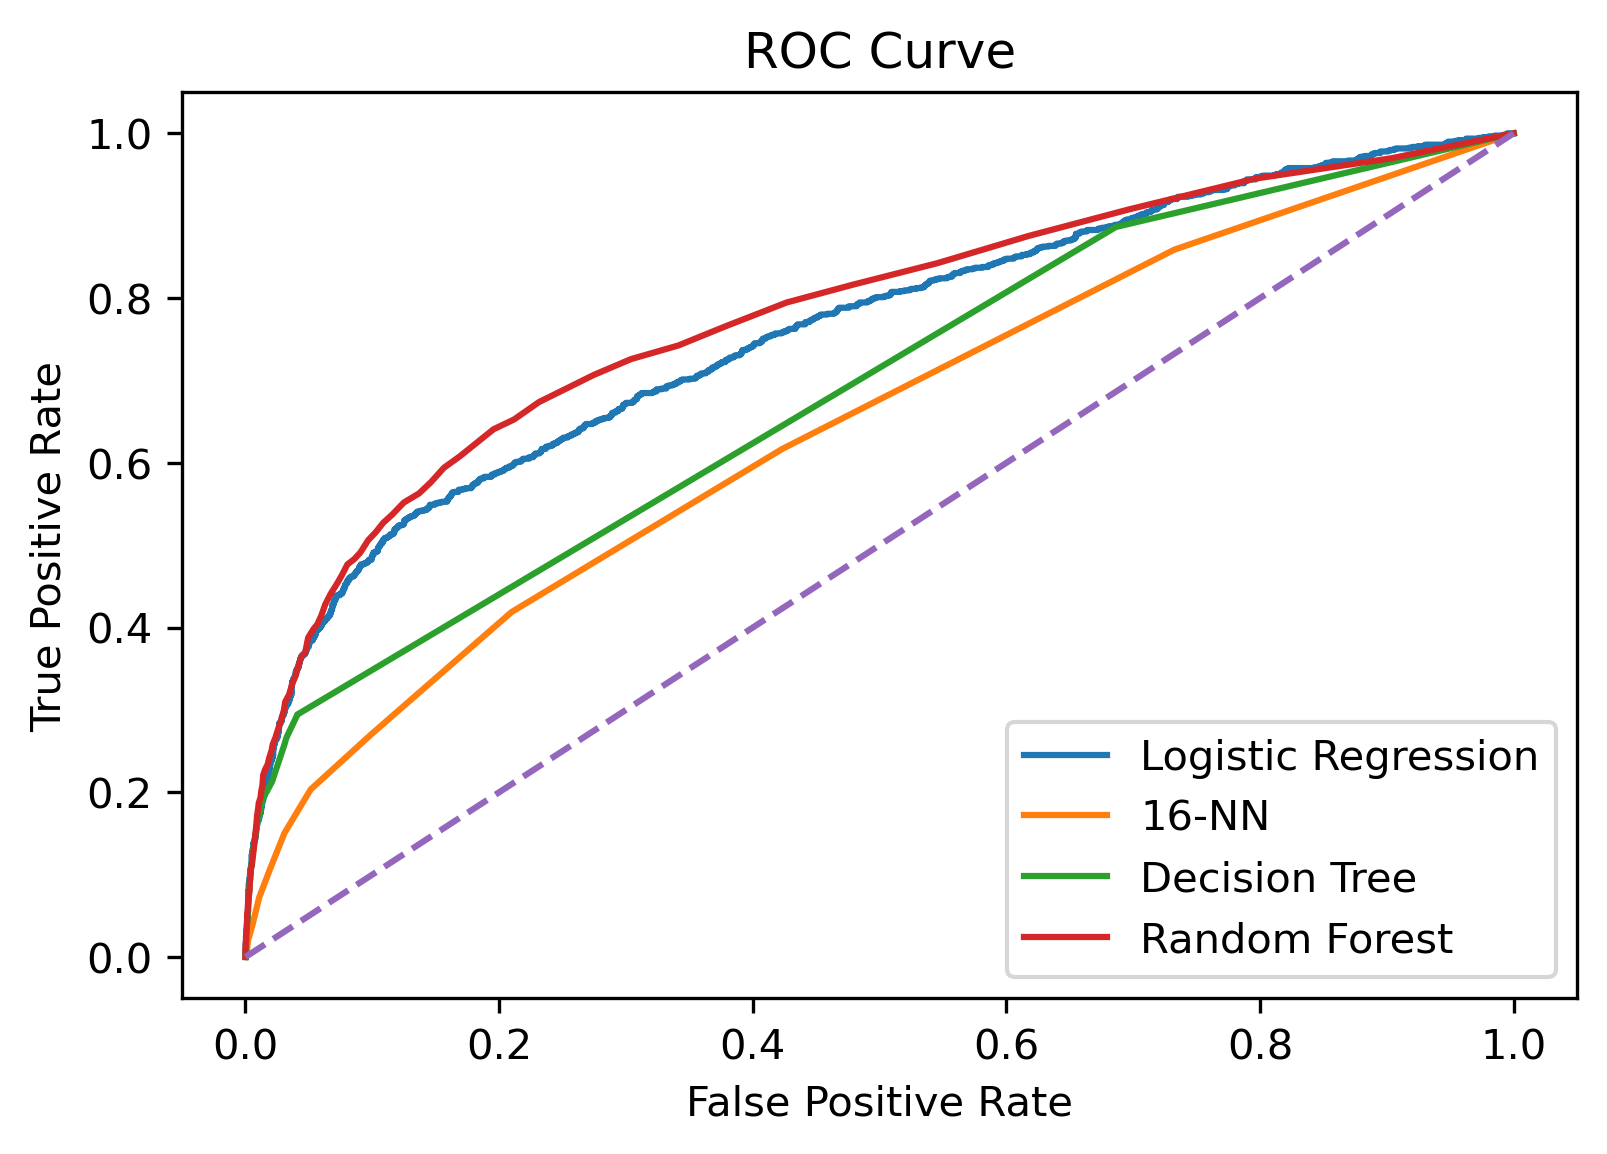

In [52]:
from sklearn.metrics import roc_curve
plt.figure(dpi=300)

fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_te)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, decisiontree.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, randomforest.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x,linestyle='--')


plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','16-NN','Decision Tree','Random Forest'])

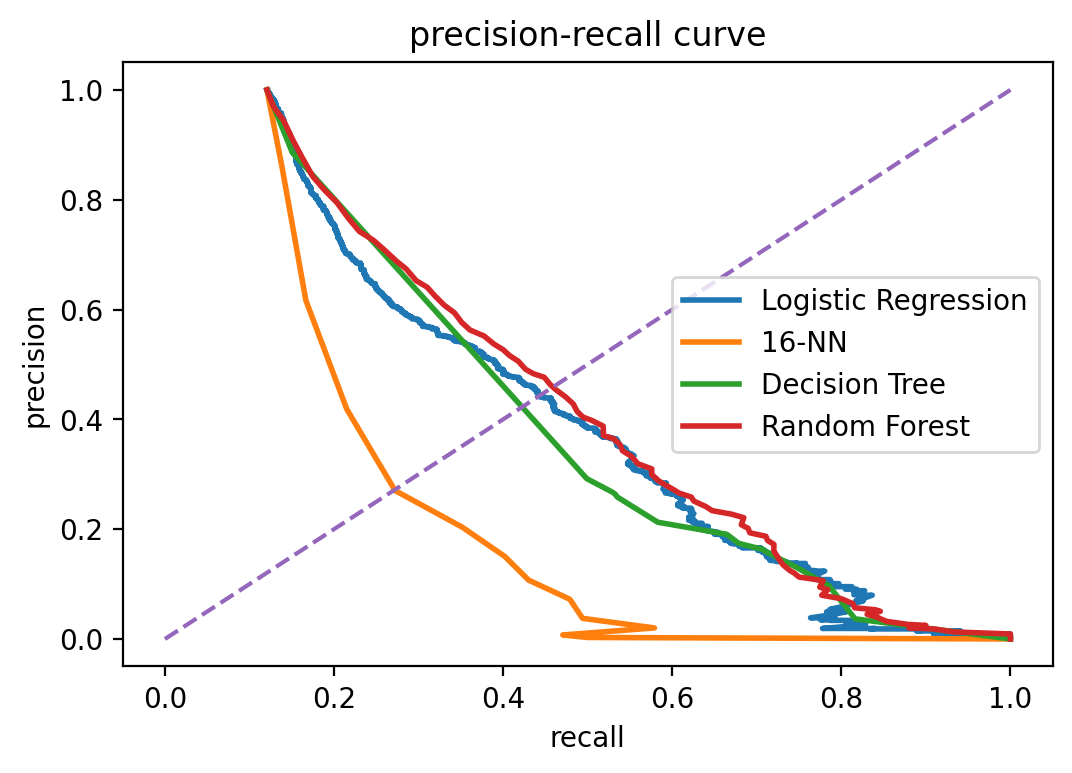

In [53]:
from sklearn.metrics import precision_recall_curve
plt.figure(dpi=200)
p_curve, r_curve, t_curve= precision_recall_curve(y_test,lr_model.predict_proba(X_te)[:,1],pos_label='yes')
plt.plot(p_curve, r_curve,lw=2)

p_curve, r_curve, t_curve= precision_recall_curve(y_test,knn.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(p_curve, r_curve,lw=2)

p_curve, r_curve, t_curve= precision_recall_curve(y_test,decisiontree.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(p_curve, r_curve,lw=2)

p_curve, r_curve, t_curve= precision_recall_curve(y_test,randomforest.predict_proba(X_test)[:,1],pos_label='yes')
plt.plot(p_curve, r_curve,lw=2)

plt.plot([0,1],[0,1],ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])                   

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall curve')
plt.legend(['Logistic Regression','16-NN','Decision Tree','Random Forest'])